# Penyelesaian Persamaan Diferensial Parsial Parabolik

## Implementasi untuk Persmaan Difusi Panas

Contoh permasalahan yang memerlukan ongkos komputasi tinggi diantaranya adalah penyelesaian persamaan diferensial parsial, yaitu suatu persamaan diferensial yang melibatkan lebih dari satu peubah bebas. Adanya lebih dari satu peubah bebas menyebabkan munculnya pertimbangan langkah diskretisasi karena diskretisasi pada satu peubah bebas akan berpotensi menimbulkan dampak pada diskretisasi peubah bebas lainnya. Pertimbangan yang nampak perlu dipertimbangkan adalah munculnya dimensi matrik yang luar biasa besar untuk mendapatkan hasil yang stabil dan ketelitian yang memadai.

Pada umumnya ada 3 jenis persamaan diferensial parsial yaitu

1. Persamaan diferensial eliptik dengan contoh yaitu
>> a. Persamaan Poisson dalam bentuk

   \begin{equation*}
   \frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=S(x,y)
   \end{equation*}

>> b. Persamaan Schrodinger tak gayut waktu dalam bentuk

  \begin{equation*}
  -\frac{\hbar^2}{2m}\left[\frac{\partial^2 \psi}{\partial x^2}+\frac{\partial^2 \psi}{\partial y^2}\right]+\hat{V}(x,y)\psi=E\psi
  \end{equation*}

2. Persamaan diferensial parabolik dengan contoh yaitu
>> a. Persamaan difusi dalam bentuk

  \begin{equation*}
  k\frac{\partial^2 u}{\partial x^2}-\frac{\partial u}{\partial t}=f(x,t)
  \end{equation*}

>> b. Persamaan Scrodinger gayut waktu dalam bentuk

  \begin{equation*}
  i\hbar\frac{\partial \psi}{\partial t}= -\frac{\hbar^2}{2m}\frac{\partial^2 \psi}{\partial x^2}+\hat{V}(x)\psi = \hat{H}\psi
  \end{equation*}

3. Persamaan diferensial hiperbolik dengan contoh yaitu
>> Persamaan gelombang dalam bentuk

  \begin{equation*}
  c^2\frac{\partial^2 u}{\partial x^2}-\frac{\partial u}{\partial t^2}=f(x,t)
  \end{equation*}


## Penyelesaian Persamaan Difusi dengan Metode Beda Hingga

Dari bentuk persamaan diferensial parabolik di atas akan nampak bahwa adanya bentuk turunan satu kali terhadap peubah bebas waktu ($t$) maka penyelesaian akan melibatkan masalah syarat awal, mirip seperti penyelesaian pada gerak bandul. Dilain pihak,  adanya bentuk turunan dua kali terhadap peubah bebas posisi ($x$) maka penyelesaian akan melibatkan masalah syarat batas, mirip seperti penyelesaian pada persamaan Poisson. Untuk masalah syarat awal maka hal yang perlu mendapat perhatian adalah pada persyaratan kestabilan, sedangkan masalah syarat batas maka hal yang perlu mendapat perhatian adalah pada persyaratan ketelitian. Kedua hal tersebut akan memunculkan suatu ungkapan umum dalam penyelesaian persamaan diferensial parabolik bahwa kestabilan dan ketelitian akan dapat dicapai apabila memenuhi ungkapan berikut.

\begin{equation}
\frac{k\Delta t}{(\Delta x)^2}\le 1
\end{equation}

Bentuk persamaan difusi panas $T(x,t)$ dalam 1 dimensi adalah: 

\begin{equation*}
  \frac{\partial T}{\partial t}=D\frac{\partial^2 T}{\partial x^2}+S(x,t)
\end{equation*}

Dalam ungkapan di atas, $D$ adalah koefisien difusi panas dan $S(x,t)$ adalah sumber panas dengan $a\le x\le b$. Syarat awal dan syarat
batas yang diberikan dianggap berjenis Derichlet yaitu

\begin{align*}
T(a,t) &= T_a\\
T(b,t) &= T_b\\
T(x,0) &= T_0(x)
\end{align*}

Yang menjadi tujuan dari masalah penyelesaian difusi panas adalah untuk memperoleh distribusi temperatur  pada sebarang ruang dan waktu yaitu $T(x,t)$. Dalam masalah ini maka  sumber panas $S(x,t)$ dianggap diketahui, termasuk nilai temperatur pada waktu awal $T(x,0)$ serta nilai temperatur pada batas daerah di $x=a$ serta $x=b$, yaitu  $T(a,t), T(b,t)$, semuanya telah diketahui.

Penyelesaian difusi panas merupakan gabungan antara penyelesian masalah syarat awal dan syarat batas karena bentuk persamaan diferensial adalah bertipe persamaan parabolik. Pada umumnya, hal yang perlu menjadi perhatian dalam tipe penyelesaian persamaan diferensial parabolik adalah potensi terjadinya ketakstabilan pada langkah numerik. 

Untuk memudahkan penulisan dalam prosedur komputasi, penyelesaian difusi panas akan menggunakan notasi diskret $x_n$ untuk posisi pada titik ke $n=0, \cdots, N$ dan $t_j$ untuk waktu pada saat ke $j=0, \cdots, J$. Dengan demikian, sebarang posisi dapat didekati dengan posisi diskret $x_n$ yang memiliki kaitan:

\begin{equation*}
x_n=x_0+n\Delta x
\end{equation*}

dengan $\Delta x=\frac{x_N-x_0}{N}$ adalah ukuran langkah ($\textit{step size}$) sedangkan $x_0=a$ dan $x_N=b$ adalah posisi di kedua ujung batas daerah.  

Dengan cara yang sama, sebarang waktu dapat didekati dengan waktu diskret $t_j$ yang memiliki kaitan:

\begin{equation*}
t_j=t_0+j\Delta t
\end{equation*}

dengan $\Delta t=\frac{t_J-t_0}{J}$ adalah selang waktu ($\textit{time step}$) sedangkan $t_0$ dan $t_J$ adalah waktu awal dan akhir.

Notasi untuk nilai diskret temparatur dan sumber panas pada posisi $x_n$ dan waktu $t_j$, yaitu $T(x_n, t_j)$ dan $S(x_n, t_j)$, biasa ditulis

\begin{equation*}
T_n^j\equiv T(x_n, t_j);\qquad S_n^j\equiv S(x_n, t_j)
\end{equation*}

### Ungkapan beda hingga (*finite difference*)

Bentuk diskret operasi diferensial bagi sebarang fungsi $f(y)$ terhadap peubah bebas $y$ dapat dinyatakan dalam ungkapan beda hingga berikut

1. Beda hingga maju (*forward difference*) untuk operasi diferensial satu kali 

\begin{equation*}
\left.\frac{df(y)}{dy}\right]_{y=y_n}\approx\frac{f_{n+1}-f_n}{\Delta y}
\end{equation*}

2. Beda hingga mundur (*backward difference*) untuk operasi diferensial satu kali 

\begin{equation*}
\left.\frac{df(y)}{dy}\right]_{y=y_n}\approx\frac{f_{n}-f_{n-1}}{\Delta y}
\end{equation*}

3. Beda hingga terpusat (*central difference*) untuk operasi diferensial satu kali 

\begin{equation*}
\left.\frac{df(y)}{dy}\right]_{y=y_n}\approx\frac{f_{n+1}-f_{n-1}}{2\Delta y}
\end{equation*}

4. Beda hingga terpusat (*central difference*) untuk operasi diferensial dua kali 

\begin{equation*}
\left.\frac{d^2f(y)}{dy^2}\right]_{y=y_n}\approx\frac{f_{n+1}-2f_n+f_{n-1}}{\Delta y^2}
\end{equation*}

## Penyelesaian dengan Metode Beda Hingga (*Finite Difference*)

### Skema eksplisit

Persamaan difusi panas di atas dapat ditulis dalam bentuk diskret, yang disebut persamaan beda hingga, dengan memanfaatkan ungkapan beda hingga maju (*forward difference*) untuk operasi diferensial satu kali terhadap waktu dan ungkapan beda hingga terpusat (*central difference*) untuk operasi diferensial dua kali terhadap posisi, sehingga berubah menjadi

\begin{equation*}
\left(\frac{T_n^{j+1}-T_n^j}{\Delta t}\right)=D\left(\frac{T_{n+1}^j-2T_n^j+T_{n-1}^j}{{\Delta x}^2}\right)+S_n^j
\end{equation*}

dengan $n=1, \cdots, N-1$, $j=0, \cdots, J$, dan $T_n^0, T_0^j, T_N^j$ semuanya memiliki nilai yang telah diketahui. Penyelesaian persamaan beda hingga dengan skema eksplisit dapat dilakukan dengan mengubah ungkapan tersebut ke dalam bentuk

\begin{equation*}
T_n^{j+1}=\lambda T_{n-1}^j+\left(1-2\lambda\right)T_n^j+\lambda T_{n+1}^j+\Delta t S_n^j
\end{equation*}

Dalam ungkapan di atas digunakan parameter $\lambda=D\frac{\Delta t}{{\Delta x}^2}$.

Ungkapan di atas disebut skema eksplisit karena dengan mengetahui nilai-nilai $T_n^0, T_0^j, T_N^j$ maka nilai-nilai $T_n^j$ akan dapat dihitung secara langsung dari ungkapan tersebut. Skema eksplisit tersebut dapat dinyatakan dalam operasi matrik seperti berikut.

\begin{equation*}
\begin{pmatrix} T_1^{j+1}\\ T_2^{j+1}\\ \vdots\\ T_{N-1}^{j+1}\end{pmatrix}=\begin{pmatrix}
  (1-2\lambda) & \lambda & 0 & \cdots & 0 \\
  \lambda & (1-2\lambda) & \lambda &\cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & \cdots & 0 & \lambda & (1-2\lambda)
 \end{pmatrix}\begin{pmatrix} T_1^j\\ T_2^j\\ \vdots\\ T_{N-1}^j \end{pmatrix}
 +\Delta t\begin{pmatrix} S_1^j\\ S_2^j\\ \vdots\\ S_{N-1}^j\end{pmatrix}+\lambda\begin{pmatrix} T_0^j\\ 0\\ \vdots\\ T_N^j\end{pmatrix}
 \end{equation*}

Meskipun skema eksplisit nampak sederhana dari aspek komputasi, namun umum diketahui bahwa skema tersebut memiliki perilaku penyelesaian yang tidak baik yaitu tidak stabil. Dapat ditunjukkan bahwa untuk pengambilan selang waktu $\Delta t$ yang tidak kecil dibanding $(\Delta x)^2$ maka akan memunculkan penyelesaian yang tidak benar, bahkan cenderung sangat berbeda jauh dengan nilai yang seharusnya.

### Skema implisit

Untuk mengatasi kendala ketakstabilan tersebut maka dapat ditempuh skema implisit. Ada banyak cara untuk memperoleh ungkapan bagi skema implisit. Salah satu cara adalah dengan meninjau ungkapan beda hingga mulai pada waktu $t_1$ sehingga dapat dimanfaatkan beda hingga mundur (_backward difference_) pada operasi diferensial satu kali terhadap waktu. Dengan demikian ungkapan persamaan beda hingga akan menjadi

\begin{equation*}
\left(\frac{T_n^{j+1}-T_n^j}{\Delta t}\right)=D\left(\frac{T_{n+1}^{j+1}-2T_n^{j+1}+T_{n-1}^{j+1}}{{\Delta x}^2}\right)+S_n^{j+1}
\end{equation*}

Dalam ungkapan lain maka dapat disajikan dalam bentuk

\begin{equation*}
-\lambda T_{n-1}^{j+1}+\left(1+2\lambda\right)T_n^{j+1}-\lambda T_{n+1}^{j+1}=T_n^j+\Delta t S_n^{j+1}
\end{equation*}

Dalam ungkapan di atas dapat dilihat bahwa perhitungan nilai $T_n^{j+1}$ belum dapat diperoleh karena pada saat yang sama, nilai-nilai $T_{n-1}^{j+1}$ dan $\psi_{n+1}^{j+1}$ belum diketahui. Dengan kenyataan ini maka disebut skema implisit karena nilai $T_n^{j+1}$ tidak dapat dinyatakan secara eksplisit dari nilai $T$ lainnya yang diketahui.

Untuk memperoleh nilai-nilai $T_n^{j+1}$ maka ungkapan persamaan linear di atas perlu diselesaikan secara simultan dengan persamaan linear lainnya berupa ungkapan persamaan matriks. Untuk mengetahui bentuk-bentuk matrik yang terlibat maka ungkapan skema implisit di atas dapaat dinyatakan dalam bentuk

\begin{equation*}
\begin{pmatrix}
  (1+2\lambda) & -\lambda & 0 & \cdots & 0 \\
  -\lambda & (1+2\lambda) & -\lambda &\cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & \cdots & 0 & -\lambda & (1+2\lambda)
 \end{pmatrix}\begin{pmatrix} T_1^{j+1}\\ T_2^{j+1}\\ \vdots\\ T_{N-1}^{j+1} \end{pmatrix}=
 \begin{pmatrix} T_1^j+\lambda T_0^{j+1}\\ T_2^j\\ \vdots\\ T_{N-1}^j+\lambda T_N^{j+1}\end{pmatrix}
 +\Delta t\begin{pmatrix} S_1^{j+1}\\ S_2^{j+1}\\ \vdots\\ S_{N-1}^{j+1}\end{pmatrix}
\end{equation*}

Nampak bahwa ungkapan tersebut merupakan bentuk operasi perkalian matrik dalam bentuk $Ay=b$, dengan matrik tridiagonal $A$ dan matrik kolom $b$ memiliki unsur-unsur matrik yang diketahui. Matrik $y$ merupakan matrik kolom yang memiliki unsur matrik berupa nilai-nilai $T_n^j$ pada lokasi diskrit $x_n$ dan waktu $t_j$. 

Dengan demikian, masalah untuk menyelesaikan persamaan difusi panas menggunakan skema implisit adalah masalah untuk memperoleh matrik kolom $y$ berdasarkan operasi matrik $Ay=b$ ketika matrik $A$ dan $b$ telah diketahui. Beberapa operasi matrik baku dapat dipilih untuk penyelesaian ini. 

Keunggulan dari skema implisit ketika dibandingkan dengan skema eksplisit adalah tidak munculnya ketakstabilan dalam proses komputasi, meskipun dilakukan pada selang waktu $\Delta t$ yang tidak kecil dibanding $(\Delta x)^2$.

Namun kerugian dari skema implisit dibandingkan dengan skema eksplisit adalah mahal pada ongkos proses komputasi (_computationally costly_) mengingat operasi matrik perlu dilakukan untuk setiap selang waktu yang diambil.

Secara ringkas dapat ditunjukkan melalui skema eksplisit dan implisit bahwa penyelesaian persamaan difusi panas dapat ditempuh dengan menggunakan proses komputasi yang berdasar pada metode beda hingga. 

Selanjutnya akan ditunjukkan bahwa metode beda hingga memiliki kendala alamiah yang sulit dihilangkan ketika digunakan untuk menyelesaikan permasalahan persamaan diferensial parabolik. Oleh karena itu akan ditinjau metode lain yang dapat mengatasi kendala tersebut.

### Skema implisit Crank-Nicholson

Skema implisit seperti diuraikan di atas sudah cukup untuk menjamin bahwa kestabilan proses komputasi akan tercapai. Namun tujuan komputasi bukanlah hanya kestabilan namun juga ketelitian hasil komputasi. Salah satu skema implisit yang memfasilitasi hal tersebut adalah apa yang disebut metode Crank-Nicholson.

Metode Crank-Nicholson didasarkan pada pengambilan pendekatan tinggi yaitu orde 2 baik pada diskretisasi waktu $t$ maupun diskretisasi ruang $x$. Dalam orde 2 tersebut maka diskretisasi waktu $t$ dievaluasi pada waktu $t=t_{j+1/2}$ sehingga dapat digunakan pendekatan beda hingga terpusat dalam bentuk

\begin{equation*}
\left.\frac{\partial T}{\partial t}\right]_{t=t_{j+1/2}}\approx\frac{T_n^{j+1}-T_n^j}{\Delta t}
\end{equation*}

Evaluasi pada $t=t_{j+1/2}$ tidak menimbulkan kesulitan pada diskretisasi waktu namun akan meumunculkan kendala ketika digunakan untuk melakukan pendekatan beda hingga terpusat pada diskretisasi ruang karena nilai $T$ pada posisi sebarang saat $t=t_{j+1/2}$ tidak tersedia. Sebagai alternatif maka digunakan pendekatan nilai tengah yaitu nilai rerata $T$ pada saat $T=t_j$ dan saat $t=t_{j+1}$ dalam bentuk

\begin{align*}
\left.\frac{\partial^2 T}{\partial x^2}\right]_{x=x_n}^{t=t_{j+1/2}}&\approx \frac{1}{2}\left(\left.\frac{\partial^2 T}{\partial x^2}\right]_{x=x_n}^{t=t_j}+\left.\frac{\partial^2 T}{\partial x^2}\right]_{x=x_n}^{t=t_{j+1}}\right)\\
&\approx\frac{T_{n+1}^j-2T_n^j+T_{n-1}^j}{2\Delta x^2}+\frac{T_{n+1}^{j+1}-2T_n^{j+1}+T_{n-1}^{j+1}}{2\Delta x^2}
\end{align*}

Ungkapan beda hingga bagi persamaan difusi panas berdasar skema tersebut menjadi

\begin{equation*}
\frac{T_n^{j+1}-T_n^j}{\Delta t}=D\left(\frac{T_{n+1}^j-2T_n^j+T_{n-1}^j}{2\Delta x^2}+\frac{T_{n+1}^{j+1}-2T_n^{j+1}+T_{n-1}^{j+1}}{2\Delta x^2}\right)+S_n^{j+1/2}
\end{equation*}

Ungkapan tersebut biasa disebut skema implisit Crank-Nicholson yang disajikan dalam bentuk

\begin{equation*}
-\lambda T_{n-1}^{j+1}+2\left(1+\lambda\right)T_n^{j+1}-\lambda T_{n+1}^{j+1}=\lambda T_{n-1}^j+2\left(1-\lambda\right)T_n^j+\lambda T_{n+1}^j+2\Delta t S_n^{j+1/2}
\end{equation*}

Dalam operasi matrik, skema implisit Crank-Nicholson dapat dinyatakan dalam bentuk

\begin{align*}
&\begin{pmatrix}
  2(1+\lambda) & -\lambda & 0 & \cdots & 0 \\
  -\lambda & 2(1+\lambda) & -\lambda &\cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & \cdots & 0 & -\lambda & 2(1+\lambda)
 \end{pmatrix}\begin{pmatrix} T_1^{j+1}\\ T_2^{j+1}\\ \vdots\\ T_{N-1}^{j+1} \end{pmatrix}=
 \lambda\begin{pmatrix} T_0^j+T_0^{j+1}\\ 0\\ \vdots\\ T_N^j+T_N^{j+1}\end{pmatrix}
 +\Delta t\begin{pmatrix} S_1^{j+1/2}\\ S_2^{j+1/2}\\ \vdots\\ S_{N-1}^{j+1/2}\end{pmatrix}\\
 &+\begin{pmatrix}
  2(1-\lambda) & \lambda & 0 & \cdots & 0 \\
  \lambda & 2(1-\lambda) & \lambda &\cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & \cdots & 0 & \lambda & 2(1-\lambda)
 \end{pmatrix}\begin{pmatrix} T_1^j\\ T_2^j\\ \vdots\\ T_{N-1}^j \end{pmatrix}
\end{align*}

Secara umum, metode Crank-Nicholson memiliki kelebihan dalam konteks kestabilan dan ketelitian hasil komputasi dibanding dua metode yang dijelaskan sebelumnya, namun dengan kelemahan terkait ongkos komputasi yang relatif lebih mahal dibanding dua metode lain yang disinggung tersebut.

## Source code Skema Eksplisit

In [1]:
using LinearAlgebra
using Plots
using LaTeXStrings

Nx = 100
Nt = 1000
D = 1.0

x = range(-5, 5, length = Nx)
t = range(0, 10, length = Nt)

dx = x[2] - x[1]
dt = t[2] - t[1]

lambda = D * dt / dx^2

temper = zeros(Float64, Nx, Nt)
temper[:, 1] = exp.(-x.^2)
temper[1, :] .= 0.0
temper[end, :] .= 0.0;    


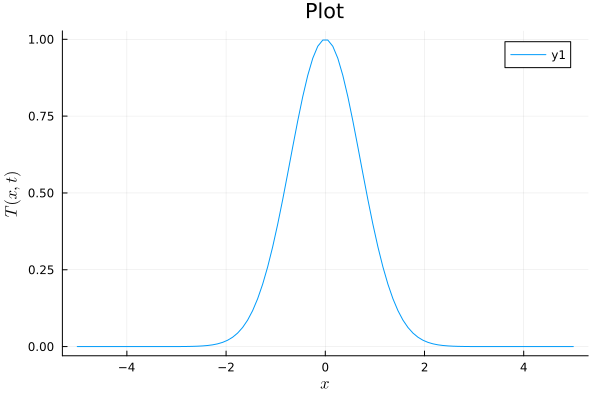

In [2]:
# Plot the initial condition
plot(x, temper[:, 1],
     xlabel=L"$x$",
     ylabel=L"$T(x,t)$",
     title="Plot")


In [3]:
function matrix_eksplisit(lambda, Nx)
    a = (1.0 - 2.0 * lambda) * ones(Nx-2)
    b = lambda * ones(Nx-3)
    A = zeros(Nx-2, Nx-2)
    A = diagm(0 => a, -1 => b, 1 => b)
    return A
end

matrix_eksplisit (generic function with 1 method)

In [4]:
A = matrix_eksplisit(lambda, Nx);

In [5]:
function skema_eksplisit(temper, A, Nt)
    for j in 1:(Nt-1)
        temper[2:end-1, j+1] = A * temper[2:end-1, j]
    end
    return temper
end 

skema_eksplisit (generic function with 1 method)

In [6]:
temper = skema_eksplisit(temper, A, Nt);

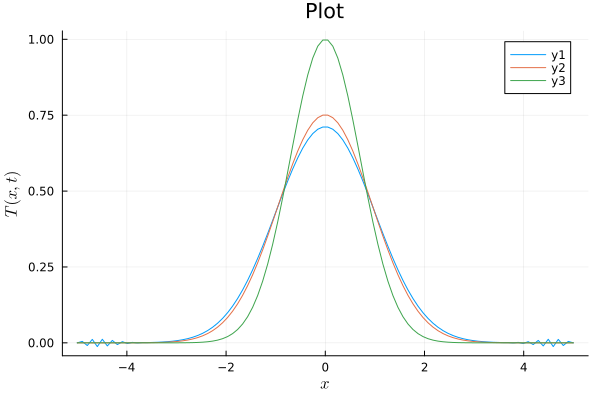

In [7]:
plot(x, [temper[:, 25],temper[:, 20], temper[:, 1]],
     xlabel=L"$x$",
     ylabel=L"$T(x,t)$",
     title="Plot")


## Source code Skema Implisit

In [8]:
Nx = 100
Nt = 1000
D = 1.5

x = range(-5, 5, length = Nx)
t = range(0, 10, length = Nt)

dx = x[2] - x[1]
dt = t[2] - t[1]

lambda = D * dt / dx^2

temper = zeros(Float64, Nx, Nt)
temper[:, 1] = exp.(-x.^2)
temper[1, :] .= 0.0
temper[end, :] .= 0.0;    

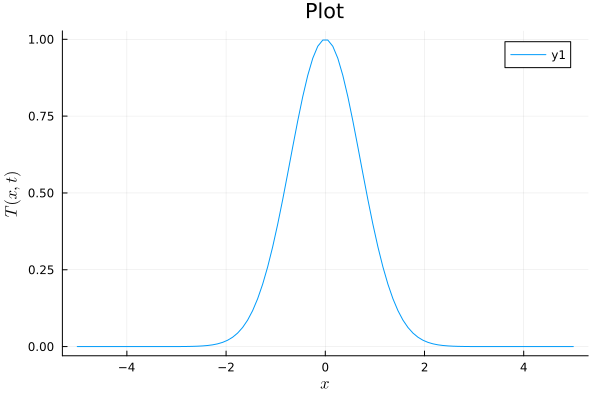

In [9]:
plot(x, temper[:, 1],
     xlabel=L"$x$",
     ylabel=L"$T(x,t)$",
     title="Plot")

In [10]:
function matrix_implisit(lambda, Nx)
    a = (1.0 + 2.0 * lambda) * ones(Nx-2)
    b = -lambda * ones(Nx-3)
    A = zeros(Nx-2, Nx-2)
    A = diagm(0 => a, -1 => b, 1 => b)
    return A
end

matrix_implisit (generic function with 1 method)

In [11]:
A = matrix_implisit(lambda, Nx);
for i in 1:(Nt-1)
    temper[2:Nx-1, i+1] = A \ temper[2:Nx-1, i];
end

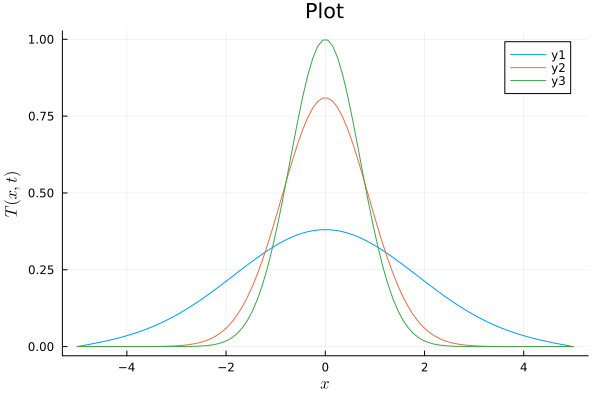

In [12]:
plot(x, [temper[:, 100],temper[:, 10], temper[:, 1]],
     xlabel=L"$x$",
     ylabel=L"$T(x,t)$",
     title="Plot")

In [13]:
function skema_implisit(A, temper, lambda, Nt, Nx)
    d = diag(A)
    e = diag(A, -1)
    b = diag(A, 1)
    m = zeros(Nx-3)
    y = zeros(Nx-2)
    for i in 2:(Nx-2)             
        m[i-1] = e[i-1] / d[i-1]
        d[i] -= m[i-1] * b[i-1]
    end

    for j in 1:(Nt-1)
        y = temper[2:end-1, j]
        for i in 3:(Nx-1)             
            y[i-1] -= m[i-2] * y[i-2]
        end
        temper[Nx-1,j+1] = temper[Nx-1,j] / d[Nx-2]
        for i in (Nx-2):-1:2
            temper[i,j+1] = (y[i-1] - b[i-1] * temper[i+1,j+1]) / d[i-1]
        end
    end

    return temper
end

skema_implisit (generic function with 1 method)

In [14]:
temper = skema_implisit(A, temper, lambda, Nt, Nx);

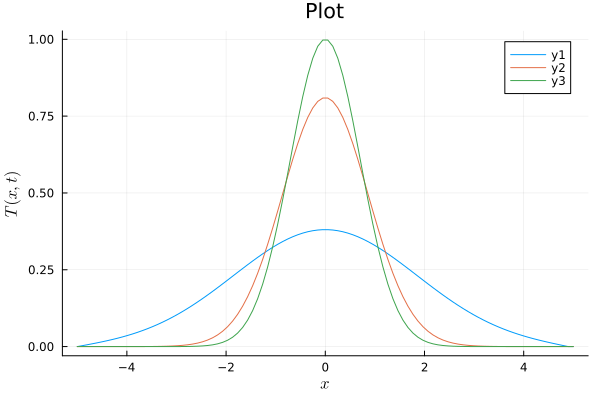

In [15]:
plot(x, [temper[:, 100],temper[:, 10], temper[:, 1]],
     xlabel=L"$x$",
     ylabel=L"$T(x,t)$",
     title="Plot")

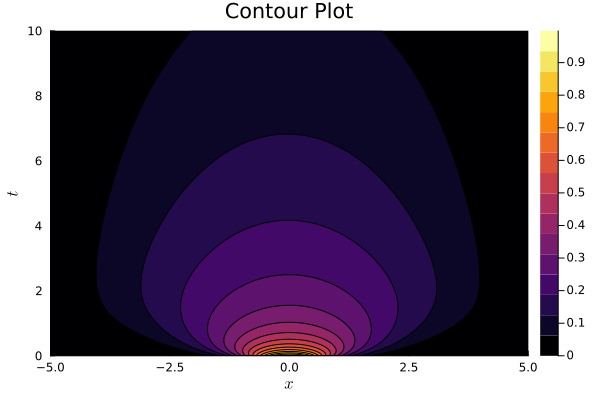

In [16]:
contour(x, t, temper',
        xlabel=L"$x$",
        ylabel=L"$t$",
        title="Contour Plot",
        fill=true)

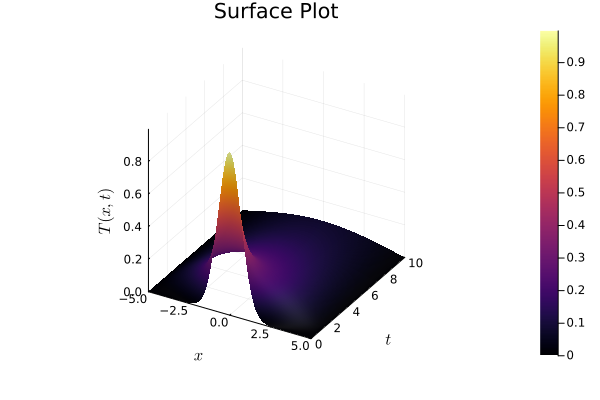

In [17]:
surface(x, t, temper',
        xlabel=L"$x$",
        ylabel=L"$t$",
        zlabel=L"$T(x,t)$",
        title="Surface Plot")

## Source code Skema Crank Nicholson

In [18]:
Nx = 100
Nt = 100
D = 1.0

x = range(-5, 5, length = Nx)
t = range(0, 10, length = Nt)

dx = x[2] - x[1]
dt = t[2] - t[1]

lambda = D * dt / dx^2

temper = zeros(Float64, Nx, Nt)
temper[:, 1] = exp.(-x.^2)
temper[1, :] .= 0.0
temper[end, :] .= 0.0;    

In [19]:
function matrix_kanan(lambda, Nx)
    a = 2.0 * (1.0 - lambda) * ones(Nx-2)
    b = lambda * ones(Nx-3)
    A = zeros(Nx-2, Nx-2)
    A = diagm(0 => a, -1 => b, 1 => b)
    return A
end

matrix_kanan (generic function with 1 method)

In [20]:
function matrix_kiri(lambda, Nx)
    a = 2.0 * (1.0 + lambda) * ones(Nx-2)
    b = -lambda * ones(Nx-3)
    A = zeros(Nx-2, Nx-2)
    A = diagm(0 => a, -1 => b, 1 => b)
    return A
end

matrix_kiri (generic function with 1 method)

In [21]:
function skema_CN(A_kanan, A_kiri, temper, lambda, Nt, Nx)
    d = diag(A_kiri)
    e = diag(A_kiri, -1)
    b = diag(A_kiri, 1)
    m = zeros(Nx-3)
    y = zeros(Nx-2)
    for i in 2:(Nx-2)             
        m[i-1] = e[i-1] / d[i-1]
        d[i] -= m[i-1] * b[i-1]
    end

    for j in 1:(Nt-1)
        y = A_kanan * temper[2:end-1, j]
        for i in 3:(Nx-1)             
            y[i-1] -= m[i-2] * y[i-2]
        end
        temper[Nx-1,j+1] = y[Nx-2] / d[Nx-2]
        for i in (Nx-2):-1:2
            temper[i,j+1] = (y[i-1] - b[i-1] * temper[i+1,j+1]) / d[i-1]
        end
    end

    return temper
end

skema_CN (generic function with 1 method)

In [22]:
A_kiri = matrix_kiri(lambda, Nx);
A_kanan = matrix_kanan(lambda, Nx);

In [23]:
temper = skema_CN(A_kanan, A_kiri, temper, lambda, Nt, Nx);

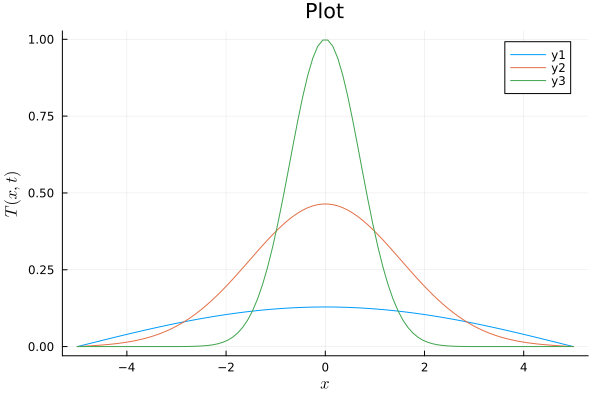

In [24]:
plot(x, [temper[:, 100],temper[:, 10], temper[:, 1]],
     xlabel=L"$x$",
     ylabel=L"$T(x,t)$",
     title="Plot")

## Komputasi berdasar Ekponensial Matrik

Suatu prosedur penyelesaiaan persamaan diferensial parsial parabolik yang agak berbeda dengan yang diuraikan di atas dapat ditempuh dengan cara berikut. Ditinjau penyelesaian persamaan difusi panas ketika langkah diskretisasi hanya dilakukan dalam peubah posisi  $x$ sedangkan peubah waktu $t$ tetap dalam ungkapan kontinu. Apabila nilai temperatur pada dua titik batas diberikan kondisi berikut yaitu $T(a,t)=0$ dan $T(b,t)=0$ dan tidak ada sumber panas yaitu $S(x,t)=0$, maka persamaan difusi panas dapat ditulis dalam bentuk berikut

\begin{align*}
\frac{\partial}{\partial t}\underbrace{\begin{pmatrix}  T_1^t\\  T_2^t\\ \vdots\\  T_{N-1}^t\end{pmatrix}}_{T(x,t)}&=\underbrace{\begin{pmatrix}
  -2\gamma & \gamma & 0 & \cdots & 0 \\
  \gamma & -2\gamma & \gamma &\cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & \cdots & 0 & \gamma & -2\gamma
 \end{pmatrix}}_A\underbrace{\begin{pmatrix} T_1^t\\ T_2^t\\ \vdots\\ T_{N-1}^t \end{pmatrix}}_{T(x,t)}\\
 \frac{\partial}{\partial t}T(x,t)&=AT(x,t);\qquad\text{dengan }\gamma=\frac{D}{(\Delta x)^2}
 \end{align*}

Ungkapan matrik pada persamaan diferensial di atas mirip seperti bentuk persamaan diferensial orde satu bagi peubah bebas $t$ yaitu $\frac{d}{dt}f(t)=c f(t)$ dengan penyelesaian berbentuk $f(t)=e^{c t}f(0)$ untuk $c$ adalah skalar.

Analog dengan bentuk penyelesaian tersebut maka penyelesaian persamaan diferensial bagi operasi matrik di atas akan berbentuk

\begin{equation*}
T(x,t)=e^{At}T(x,0)
\end{equation*}

Bentuk eksplisit dalam operasi matrik bagi ungkapan di atas adalah

\begin{equation*}
\begin{pmatrix}  T_1^t\\  T_2^t\\ \vdots\\  T_{N-1}^t\end{pmatrix}=exp\left[\begin{pmatrix}
  -2\gamma & \gamma & 0 & \cdots & 0 \\
  \gamma & -2\gamma & \gamma &\cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & \cdots & 0 & \gamma & -2\gamma
 \end{pmatrix}t\right]\begin{pmatrix} T_1^0\\ T_2^0\\ \vdots\\ T_{N-1}^0 \end{pmatrix}
\end{equation*}

Dari ungkapan di atas nampak bahwa penyelesaian persamaan diferensial parsial parabolik yang diwakili oleh persamaan difusi panas dapat dinyatakan dalam skema eksplisit seperti yang disajikan pada uraian sebelumnya, ketika bentuk operasi turunan satu kali terhadap waktu didekati dengan bentuk beda hingga maju (_forward difference_). Perbedaan antara skema eksplisit tersebut dengan skema eksplisit pada pendekatan beda hingga maju adalah pada bentuk matrik pada ruas kanan. 

Pada ungkapan tersebut, bentuk matrik merupakan perwujudan dari operasi eksponensial terhadap suatu matrik $A$, bukan operasi eksponensial terhadap suatu skalar $\gamma$. Operasi eksponensial terhadap suatu matrik biasa disebut sebagai eksponensial matrik.

## Komputasi Eksponensial Matrik 

Untuk sebarang bentuk matrik $A$ maka komputasi untuk eksponensial matrik $e^A$ akan membutuhkan daya komputasi tinggi (_demanding_) karena akan melibatkan perkalian matrik $A$ yang sangat besar, seperti dapat dilihat dalam ungkapan deret berikut

\begin{equation*}
e^A=I+A+\frac{1}{2!}A^2+\cdots+\frac{1}{n!}A^n+\cdots
\end{equation*}

dengan $I$ adalah matrik identitas.

Oleh karena itu maka beberapa langkah komputasi perlu digunakan untuk dapat mendekati nilai dari eksponensial matrik. Salah metode komputasi yang umum dilakukan adalah dengan menggunakan pendekatan _Pade_ (_Pade approximation_). 

Satu sifat khusus bagi eksponensial matrix apabila matrik $A$ berbentuk matrik diagonal yaitu

\begin{equation*}
A=\begin{pmatrix}
  a_{11} & 0 & \cdots & 0 \\
  0 & a_{22} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & \cdots & 0 & a_{NN} 
 \end{pmatrix}
\end{equation*}

maka bentuk eksponensial matrik akan sederhana berbentuk diagonal yaitu 

\begin{equation*}
e^A=\begin{pmatrix}
  e^{a_{11}} & 0 & \cdots & 0 \\
  0 & e^{a_{22}} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & \cdots & 0 & e^{a_{NN}} 
 \end{pmatrix}
\end{equation*}

Sifat ini sering dimanfaatkan untuk melakukan komputasi bagi matrik eksponensial berdasar pada prosedur diagonalisasi matrik dalam Aljabar Linear. Untuk matrik $A$ yang berukuran tidak terlalu besar sedemikian hingga seluruh nilai eigen beserta vektor eigen dari matrik $A$ akan dapat diperoleh, maka prosedur diagonalisasi matrik bagi matrik $A$ akan berbentuk

\begin{equation*}
A=UDU^{-1}
\end{equation*}

Matrik diagonal $D$ berisi nilai-nilai eigen dari matrik $A$ pada unsur-unsur diagonalnya sedang matrik $U$ berisi vektor-vektor eigen pada tiap kolom matrik.

Apabila proses diagonalisasi berhasil, yaitu matrik $D$ dan matrik $U$ dapat diperoleh, maka proses komputasi matrik eksponensial $e^A$ akan menjadi lebih sederhana yaitu berbentuk

\begin{equation*}
e^A=Ue^DU^{-1}
\end{equation*}

dengan $e^D$ akan berbentuk seperti pers (10b).

Sifat lain yang berguna bagi eksponensial matrik adalah bahwa transpose bagi matrik $A^T$ akan terkait langsung dengan transpose bagi eksponensial matrik yaitu

\begin{equation*}
e^{A^T}=\left(e^A\right)^T
\end{equation*}

Dapat ditunjukkan bahwa ungkapan yang lebih sesuai bagi ungkapan di atas adalah mengikuti apa yang disebut rumus _Baker-Campbell-Hausdorff_ yaitu

\begin{equation*}
e^{A}\,e^{B}=e^{(A+B)+\frac{1}{2}[A,B]+\frac{1}{12}[A,[A,B]]+\cdots}
\end{equation*}

Berdasarkan persamaan tersebut akan mudah ditunjukkan bahwa 

\begin{equation*}
e^{A+B}\neq e^A\,e^B
\end{equation*}

ketika matrik $A$ dan $B$ adalah tidak komutatif, yaitu $[A,B]\neq 0$. 


### Metode dekomposisi matrik _Suzuki-Trotter_

Untuk nilai parameter $\tau\approx 0$, _Trotter_ menunjukkan bahwa pendekatan berikut akan berlaku

\begin{equation*}
e^{\tau A}\,e^{\tau B}=\left[e^{\left(\frac{\tau}{n}\right) A}\,e^{\left(\frac{\tau}{n}\right) B}\right]^n=\left[e^{\left(\frac{\tau}{n}\right)(A+B)+\frac{1}{2}{\left(\frac{\tau}{n}\right)}^2[A,B]+\frac{1}{12}{\left(\frac{\tau}{n}\right)}^3[A,[A,B]]+\cdots}\right]^n\approx e^{\tau(A+B)}
\end{equation*}

Atau dapat ditulis pada pendekatan orde pertama sebagai

\begin{equation*}
e^{\tau(A+B)}\approx e^{\tau A}\,e^{\tau B}
\end{equation*}

_Suzuki_ memperluas pendekatan _Trotter_ di atas, sehingga disebut pendekatan dekomposisi _Suzuki-Trotter_, untuk orde dua yaitu

\begin{equation*}
e^{\tau(A+B)}\approx e^{\frac{\tau}{2} A}\,e^{\tau B}\,e^{\frac{\tau}{2} A}
\end{equation*}

Implementasi pendekatan dekomposisi _Suzuki-Trotter_ untuk penyelesaian persamaan difusi panas dapat dilakukan dengan meninjau bahwa proses difusi pada seluruh waktu $t$ akan dilakukan secara diskret pada tiap selang waktu yang sangat kecil yaitu sebesar $\Delta t=\tau$ dengan mengambil bahwa

\begin{equation*}
\tau=\Delta t=\frac{t_N-t_0}{N}
\end{equation*}

Oleh karena itu sebarang waktu akan dapat dinyatakan sebagai 

\begin{equation*}
t\approx t_N=t_{N-1}+\Delta t=t_{N-2}+\Delta t+\Delta t=\cdots=t_0+N\Delta t=t_0+N\tau
\end{equation*}

Penyelesaian persamaan difusi panas akan dilakukan secara bertahap selama waktu kecil $\tau$ berdasar persamaan tersebut yaitu

\begin{equation*}
T(x,\tau)=e^{\tau A} T(x,0)
\end{equation*}

Perhitungan temperatur selama $\tau$ dapat memanfaatkan pendekatan dekomposisi _Suzuki-Trotter_ orde satu atau orde dua berdasar dua persamaan yang disinggung sebelumnya. 

Sebagai contoh, apabila menggunakan pendekatan orde satu dan matrik $A$ akan dipisah berdasar sokongan dua matrik yang lebih sederhana yaitumatrik $A_1$ dan matrik $A_2$ maka persamaan tersebut berbentuk

\begin{equation*}
T(x,\tau)=e^{\tau A} T(x,0)=e^{\tau(A_1+A_2)}T(x,0)\approx e^{\tau A_1}e^{\tau A_2} T(x,0)
\end{equation*}

Pada umumnya, operasi matrik yang terlibat pada komputasi eksponensial matrik tanpa dekomposisi akan membutuhkan ongkos komputasi tingi (_demanding_) dibanding operasi matrik yang melibatkan komputasi eksponensial matrik dekomposisi.


### Implementasi metode dekomposisi eksponensial matrik untuk persamaan difusi panas

Ditinjau keadaan ketika parameter $\tau$ adalah kecil yaitu $\tau=\Delta t=\frac{t_N-t_0}{N}$. Untuk bentuk matrik $A$ seperti dalam persamaan difusi panas maka ada beberapa tahap dekomposisi yang dapat dilakukan.

- **Tahat dekomposisi pertama**

\begin{equation*}
\underbrace{\begin{pmatrix}
  -2\gamma & \gamma & 0 & \cdots & 0 \\
  \gamma & -2\gamma & \gamma &\cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & \cdots & 0 & \gamma & -2\gamma
\end{pmatrix}}_A=\underbrace{\begin{pmatrix}
  -2\gamma & 0 & 0 & \cdots & 0 \\
  0 & -2\gamma & 0 &\cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & \cdots & 0 & 0 & -2\gamma
 \end{pmatrix}}_{A_1}+\underbrace{\begin{pmatrix}
  0 & \gamma & 0 & \cdots & 0 \\
  \gamma & 0 & \gamma &\cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & \cdots & 0 & \gamma & 0
 \end{pmatrix}}_{A_2}
\end{equation*}

Tahap dekomposisi pertama dilakukan dengan beberapa pertimbangan yaitu

>> - Matrik $A_1$ dan $A_2$ bersifat komutatif yaitu $[A_1,A_2]=A_1 A_2 - A_2 A_1=0$.
>> - Karena bersifat komutatif maka berlaku kaitan berikut

\begin{equation*}
e^A=e^{(A_1+A_2)}=e^{A_1}e^{A_2}
\end{equation*}

>> - Matrik $A_1$ berbentuk diagonal sehingga bentuk eksponensial matrik menjadi sederhana.

\begin{equation*}
e^{A_1}=\begin{pmatrix}
  e^{-2\gamma} & 0 & \cdots & 0 \\
  0 & e^{-2\gamma} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & \cdots & 0 & e^{-2\gamma} 
 \end{pmatrix}
\end{equation*}


- **Tahap dekomposisi kedua**

\begin{equation*}
\underbrace{\begin{pmatrix}
  0 & \gamma & 0 & 0 & \cdots & 0 \\
  \gamma & 0 & \gamma & 0 &\cdots & 0 \\
  0&\gamma & 0 &\gamma & \cdots &0\\
  \vdots  & \vdots  & \vdots & \ddots & \cdots & \vdots  \\
    0 & \cdots & 0 & \gamma & 0 &\gamma\\
  0 & \cdots & 0 & 0 & \gamma & 0
 \end{pmatrix}}_{A_2}=\underbrace{\begin{pmatrix}
  0 & \gamma & 0 & 0 & \cdots & 0 \\
  0 & 0 & \gamma & 0 &\cdots & 0 \\
  0&0 & 0 &\gamma & \cdots &0\\
  \vdots  & \vdots  & \vdots & \ddots & \cdots & \vdots  \\
    0 & \cdots & 0 & 0 & 0 &\gamma\\
  0 & \cdots & 0 & 0 & 0 & 0
 \end{pmatrix}}_{A_3}+\underbrace{\begin{pmatrix}
  0 & 0 & 0 & 0 & \cdots & 0 \\
  \gamma & 0 & 0 & 0 &\cdots & 0 \\
  0&\gamma & 0 &0 & \cdots &0\\
  \vdots  & \vdots  & \vdots & \ddots & \cdots & \vdots  \\
    0 & \cdots & 0 & \gamma & 0 &0\\
  0 & \cdots & 0 & 0 & \gamma & 0
 \end{pmatrix}}_{A_4}
\end{equation*}

Upaya untuk memperoleh eksponensial matrik bagi $A_2$ dengan melakukan dekomposisi terlebih dahulu bagi matrik $A_2 menjadi penjumlahan matrik $A_3$ dan $A_4$ seperti di atas adalah dalam upaya agar proses pencarian eksponensial matrik $A_2$ menjadi lebih sederhana. Penjelasan untuk itu dapat diberikan melalui gambaran berikut.

Bentuk matrik seperti $A_3$ atau $A_4$ disebut matrik _nilpotent_. Berdasar definisi yang disebut matrik _nilpotent_ adalah suatu matrik $A$ sedemikian hingga memenuhi $A^k$ untuk $k$ merupakan bilangan bulat tertentu. Sebagai gambaran, tinjau matrik $A_3$ dengan orde $4\times 4$. Maka dapat ditunjukkan operasi matrik berikut:

\begin{align*}
A_3^2&=\begin{pmatrix}
  0 & \gamma & 0 & 0 \\
  0 & 0 & \gamma & 0 \\
  0&0 & 0 &\gamma\\
   0 & 0 & 0 & 0 
 \end{pmatrix}\begin{pmatrix}
  0 & \gamma & 0 & 0 \\
  0 & 0 & \gamma & 0 \\
  0&0 & 0 &\gamma\\
   0 & 0 & 0 & 0 
 \end{pmatrix}=\begin{pmatrix}
  0 & 0& \gamma^2 & 0 \\
  0 & 0 & 0&\gamma^2\\
  0&0 & 0 & 0\\
   0 & 0 & 0 & 0 
 \end{pmatrix}\\
 A_3^3&=\begin{pmatrix}
  0 & 0& \gamma^2 & 0 \\
  0 & 0 & 0&\gamma^2\\
  0&0 & 0 & 0\\
   0 & 0 & 0 & 0 
 \end{pmatrix}\begin{pmatrix}
  0 & \gamma & 0 & 0 \\
  0 & 0 & \gamma & 0 \\
  0&0 & 0 &\gamma\\
   0 & 0 & 0 & 0 
 \end{pmatrix}=\begin{pmatrix}
  0 & 0& 0& \gamma^3\\
  0 & 0 & 0&0\\
  0&0 & 0 & 0\\
   0 & 0 & 0 & 0 
 \end{pmatrix}\\
A_3^4&=\begin{pmatrix}
  0 & 0&0& \gamma^3\\
  0 & 0 & 0&0\\
  0&0 & 0 & 0\\
   0 & 0 & 0 & 0 
 \end{pmatrix}\begin{pmatrix}
  0 & \gamma & 0 & 0 \\
  0 & 0 & \gamma & 0 \\
  0&0 & 0 &\gamma\\
   0 & 0 & 0 & 0 
 \end{pmatrix}=\begin{pmatrix}
  0 & 0& 0& 0\\
  0 & 0 & 0&0\\
  0&0 & 0 & 0\\
   0 & 0 & 0 & 0 
 \end{pmatrix}
\end{align*} 

Dengan bentuk matrik _nilpoten_ $A_3$ berorde 4 seperti di atas maka ungkapan eksponensial matrik bagi $A_3$ menjadi mudah untuk diperoleh yaitu

\begin{align*}
e^{A_3}&=I+A_3+\frac{1}{2}A_3^2+\frac{1}{3!}A_3^3+\frac{1}{4!}A_3^4+0=\begin{pmatrix}
  1 & 0& 0 & 0 \\
  0 & 1 & 0&0\\
  0&0 & 1 & 0\\
   0 & 0 & 0 & 1\end{pmatrix}+\begin{pmatrix}
  0 & \gamma & 0 & 0 \\
  0 & 0 & \gamma & 0 \\
  0&0 & 0 &\gamma\\
   0 & 0 & 0 & 0 
 \end{pmatrix}\\
&+\frac{1}{2}\begin{pmatrix}
  0 & 0& \gamma^2 & 0 \\
  0 & 0 & 0&\gamma^2\\
  0&0 & 0 & 0\\
   0 & 0 & 0 & 0\end{pmatrix}+\frac{1}{3!}\begin{pmatrix}
  0 & 0& 0 & \gamma^3 \\
  0 & 0 & 0&0\\
  0&0 & 0 & 0\\
   0 & 0 & 0 & 0\end{pmatrix}+\frac{1}{4!}\begin{pmatrix}
  0 & 0& 0& 0 \\
  0 & 0 & 0&0\\
  0&0 & 0 & 0\\
   0 & 0 & 0 & 0\end{pmatrix}+0\\
  &=\begin{pmatrix}
  1 & \gamma& \frac{1}{2}\gamma^2& \frac{1}{6}\gamma^3 \\
  0 & 1 & \gamma&\frac{1}{2}\gamma^2\\
  0&0 & 1 & \gamma\\
   0 & 0 & 0 & 1\end{pmatrix} 
\end{align*}   

Karena $A_4$ merupakan transpose dari $A_3$ yaitu memenuhi kaitan $A_4=A_3^T$ maka proses untuk memperoleh eksponensial matrik bagi $A_4$ menjadi sederhana yaitu

\begin{equation*}
e^{A_4}=e^{A_3^T}=\left(e^{A_3}\right)^T=\begin{pmatrix}
  1 & \gamma& \frac{1}{2}\gamma^2& \frac{1}{6}\gamma^3 \\
  0 & 1 & \gamma&\frac{1}{2}\gamma^2\\
  0&0 & 1 & \gamma\\
   0 & 0 & 0 & 1\end{pmatrix}^T=\begin{pmatrix}
  1 & 0& 0& 0 \\
  \gamma & 1 & 0&0\\
  \frac{1}{2}\gamma^2&\gamma & 1 & 0\\
   \frac{1}{6}\gamma^3 & \frac{1}{2}\gamma^2 & \gamma & 1\end{pmatrix}
\end{equation*}

Dengan contoh tersebut maka prosedur untuk komputasi temperatur $T(x,\tau)$ berdasar eksponensial matrik dengan pendekatan Suzuki-Trotter orde 1 dilakukan dengan ungkapan berikut.

\begin{align*}
T(x,\tau)&=e^{\tau A} T(x,0)=e^{\tau(A_1+A_2)}T(x,0)= e^{\tau A_1}e^{\tau A_2} T(x,0)\\
&=e^{\tau A_1}e^{\tau (A_3+A_4)} T(x,0)\approx e^{\tau A_1}e^{\tau A_3}e^{\tau A_4} T(x,0)
\end{align*}

Implementasi bagi prosedur di atas dapat dilakukan dengan _source-code_ berikut.

In [25]:
using LinearAlgebra
using Plots
using LaTeXStrings


In [26]:
function exp_nilpotent(b)
    n = length(b)
    A = zeros(n+1, n+1)
    A[end, end] = 1.0
    for i in 1:n
        A[i, i] = 1.0
        l = 0
        for j in i+1:n+1
            l +=1
            A[i, j] = A[i,j-1]*b[i]/l
        end
    end
    return A
end

exp_nilpotent (generic function with 1 method)

In [27]:
Nx = 100
Nt = 100
D = 1.0

x = range(-5, 5, length = Nx)
t = range(0, 10, length = Nt)

dx = x[2] - x[1]
dt = t[2] - t[1]

gamma = D / dx^2
tau = dt
lambda = gamma * tau    

temper = zeros(Float64, Nx, Nt)
temper[:, 1] = exp.(-x.^2)
temper[1, :] .= 0.0
temper[end, :] .= 0.0;    

### Pendekatan Suzuki-Trotter orde 1

In [28]:
b = lambda * ones(Nx-3);

In [29]:
A3 = exp_nilpotent(b);

In [30]:
function skema_ExpMat1(A3, temper, lambda, Nt, Nx)
    A4 = transpose(A3)
    d = exp(-2.0 * lambda) * ones(Nx-2)
    A1 = diagm(d)
    evolusi = zeros(Nx-2, Nx-2)
    evolusi = A1 * A3 * A4
    for i in 2:Nt             
        temper[2:Nx-1,i] =  evolusi * temper[2:Nx-1,i-1]
    end

    return temper
end

skema_ExpMat1 (generic function with 1 method)

In [31]:
temper1 = skema_ExpMat1(A3, temper, lambda, Nt, Nx);

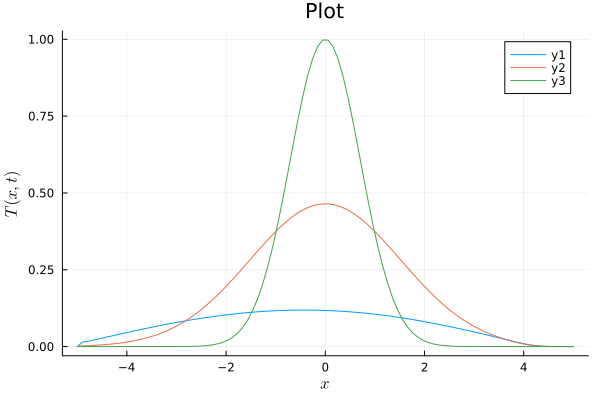

In [32]:
plot(x, [temper1[:, 100],temper1[:, 10], temper1[:, 1]],
     xlabel=L"$x$",
     ylabel=L"$T(x,t)$",
     title="Plot")

### Pendekatan Suzuki-Trotter orde 2

In [33]:
b = 0.5 * lambda * ones(Nx-3);

In [34]:
A3 = exp_nilpotent(b);

In [35]:
function skema_ExpMat2(A3, temper, lambda, Nt, Nx)
    A4 = transpose(A3)
    d = exp(-2.0 * lambda) * ones(Nx-2)
    A1 = diagm(d)
    evolusi = zeros(Nx-2, Nx-2)
    evolusi = A1 * transpose(A3 * A4) * A3 * A4
    for i in 2:Nt             
        temper[2:Nx-1,i] =  evolusi * temper[2:Nx-1,i-1]
    end

    return temper
end

skema_ExpMat2 (generic function with 1 method)

In [36]:
temper2 = skema_ExpMat2(A3, temper, lambda, Nt, Nx);

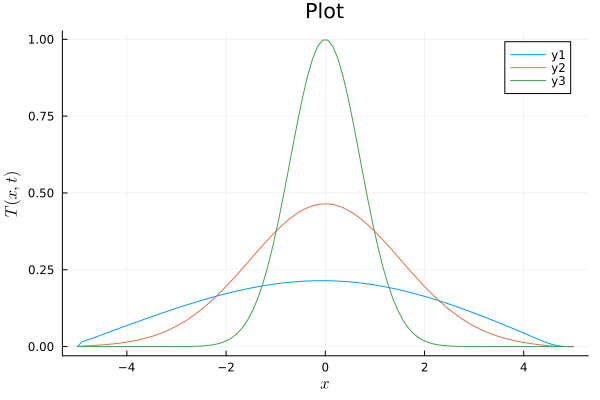

In [37]:
plot(x, [temper2[:, 50],temper2[:, 10], temper2[:, 1]],
     xlabel=L"$x$",
     ylabel=L"$T(x,t)$",
     title="Plot")

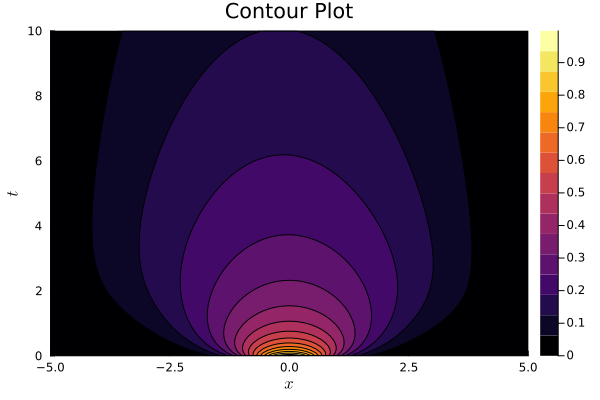

In [38]:
contour(x, t, temper',
        xlabel=L"$x$",
        ylabel=L"$t$",
        title="Contour Plot",
        fill=true)
     

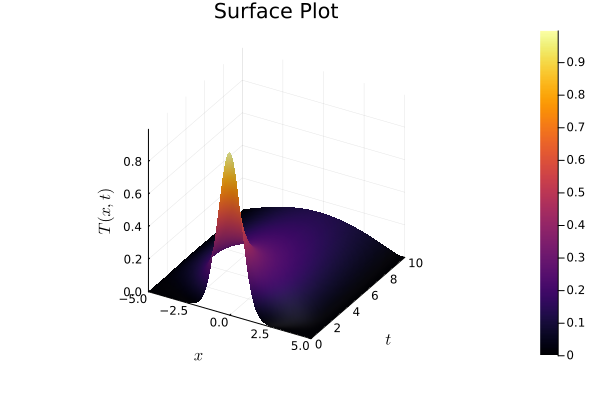

In [39]:
surface(x, t, temper',
        xlabel=L"$x$",
        ylabel=L"$t$",
        zlabel=L"$T(x,t)$",
        title="Surface Plot")